# Image Classification with TensorFlow and Keras

# Experiment Objective

The purpose of this experiment a binary classification problem with the aim to see weather the model I created will be able to predict whether the image shows happiness or sadness.

The data was collected from Google Open Source image, an extension was used to download the images into a zip file and later the used in the model created. 

The images are classified as binary 0 and 1, where Class 0 is labeled as Happy and Class 1 is labeled Sad. 

TensorFlow Datasets were NOT used.

This is  whether the image of happ

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.2.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.1.2
anaconda-project                   0.9.1
anyascii                           0.3.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0

# Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [ ]:
gpus

[]

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)
# avoids error by setting memory consumption growth

# Removing Unnecessary images from the files

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = 'data'

In [ ]:
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '114QUyfpbMJdeNVGNrfhezA.jpeg',
 '1200px-Happy_People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '192px.svg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '1rOrTgNQABn0P7dy3IrNDjg.jpeg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '220px-Happy_People_A_Year_in_the_Taiga_poster.jpg',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '31418025-diverse-happy-people.jpg',
 '35438_hd.jpg',
 '5-Ways-To-Really-Unwind-This-Weekend-1100x733.jpg',
 '56f455011e0000b300705475.jpeg',
 '7-Habits-of-Happy-People-image.jpeg',
 '71hBPTAhIXL.jpg',
 '960x0.jpg',
 'AOh-ky2FpWJbDLAlIPsIfPx1xpySPl9vtUc8jCdZRz7VgQs64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'blog_image_20180219221810890.jpg',
 'compassion-900x387.jpg',
 'Cover-Happy-Habits.jpg',
 'Dollarphotoclub_76084977-1.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'eople_are_

In [ ]:
image_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [ ]:
image_exts[3]

'bmp'

In [ ]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
sad


In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print (image)

05-12-21-happy-people.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
114QUyfpbMJdeNVGNrfhezA.jpeg
1200px-Happy_People.jpg
154006829.jpg
170404-happy-workers-feature.jpg
1920px-face-smile.svg_.png.jpg
1HEoLBLidT2u4mhJ0oiDgig.png
1rOrTgNQABn0P7dy3IrNDjg.jpeg
20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
220px-Happy_People_A_Year_in_the_Taiga_poster.jpg
227-2271622_happy-people-business-team-celebrating-png.png
31418025-diverse-happy-people.jpg
35438_hd.jpg
5-Ways-To-Really-Unwind-This-Weekend-1100x733.jpg
56f455011e0000b300705475.jpeg
7-Habits-of-Happy-People-image.jpeg
71hBPTAhIXL.jpg
960x0.jpg
A_Sep20_14_1189155141.jpg
blog_image_20180219221810890.jpg
compassion-900x387.jpg
Cover-Happy-Habits.jpg
Dollarphotoclub_76084977-1.jpg
e162ccda8ce0f197f8863f327add9233.jpg
eople_are_healthier_Some_65_percent_of_relevant_studies_f-m-21_1500384450707.jpg
excited-bride-young-woman-20s-260nw-1924625633.jpg
fiendship-concept-smiling-friends-communication-weekend-u

In [ ]:
img = cv2.imread(os.path.join('data', 'happy', 'Gardening.jpg'))

In [ ]:
img.shape

(480, 640, 3)

In [ ]:
type(img)

numpy.ndarray

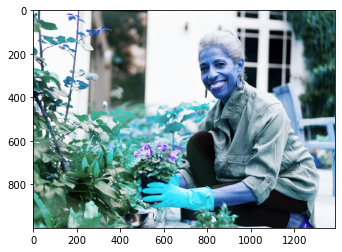

In [ ]:
plt.imshow(img)

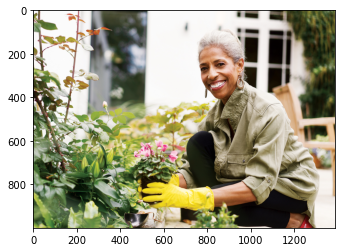

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("image not in {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
                print("issues with".format(image_path))

image not in data\happy\114QUyfpbMJdeNVGNrfhezA.jpeg
image not in data\happy\1200px-Happy_People.jpg
image not in data\happy\1rOrTgNQABn0P7dy3IrNDjg.jpeg
image not in data\happy\220px-Happy_People_A_Year_in_the_Taiga_poster.jpg
image not in data\happy\31418025-diverse-happy-people.jpg
image not in data\happy\56f455011e0000b300705475.jpeg
image not in data\happy\eople_are_healthier_Some_65_percent_of_relevant_studies_f-m-21_1500384450707.jpg
image not in data\happy\excited-bride-young-woman-20s-260nw-1924625633.jpg
image not in data\happy\guilherme-stecanella-375176-unsplash.jpg
image not in data\happy\happy-people-group-fb.jpg
image not in data\happy\portrait-young-father-carrying-his-260nw-736997836.jpg
image not in data\happy\sjnv_cnh7ugnaddm7so6sq.jpg
image not in data\sad\1200px-Sad-Mental-Illness.jpg
image not in data\sad\14HRhniN7B7Fqx5GCoFpQ3A.jpeg
image not in data\sad\1800x1200_visual_guide_to_seasonal_affective_disorder_sad_slideshow.jpg
image not in data\sad\1s_bfK50lQFBR9t6

In [ ]:
## tf.data.Dataset??

In [ ]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [ ]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 204 files belonging to 2 classes.


#### This will allow us to access the generator from the pipeline

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
data_iterator

#### This accesses the pipeline itself

In [ ]:
batch = data_iterator.next()

In [ ]:
batch

(array([[[[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          ...,
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02]],
 
         [[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          ...,
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02]],
 
         [[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
          ...,
          [2.55000000e+02, 2.55000000e+02, 2.5500

##### this shows that there is 2 part of the dataset: images and labels

In [ ]:
len(batch)

2

In [ ]:
# images whicch are represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[1]

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0])

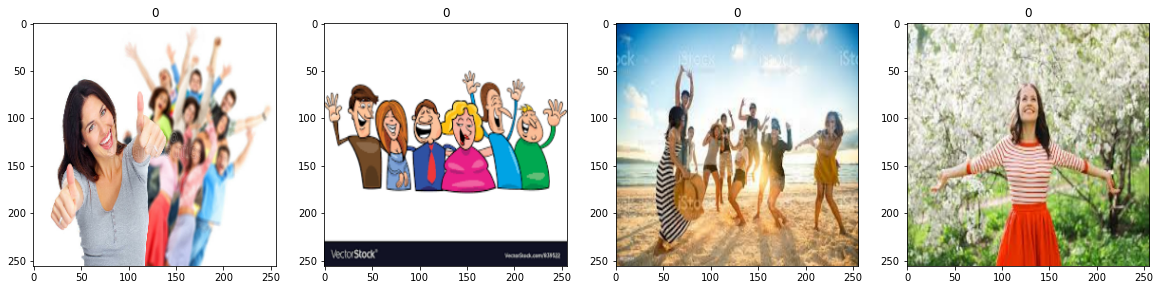

In [ ]:
## this shows was what binary number is assigned to which charactersitics
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
## from the above images we can see that class 1 is sad and class 0 is happy

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[0].min()

0.0

In [ ]:
batch[0].max()

255.0

In [ ]:
batch[0]/255

array([[[[1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
         [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
         [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
         ...,
         [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
         [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
         [1.0000000e+00, 1.0000000e+00, 1.0000000e+00]],

        [[1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
         [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
         [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
         ...,
         [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
         [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
         [1.0000000e+00, 1.0000000e+00, 1.0000000e+00]],

        [[1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
         [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
         [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
         ...,
         [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
         [1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
  

In [ ]:
scaled = batch[0] / 255

In [ ]:
scaled.max()

1.0

## Preprocessing the data

#### Splitting the data into training, testing and validation partition to make sure to not overfit 

In [ ]:
#scaling the data
# x represents images
# y represents target variable

data = data.map(lambda x,y: (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].max()

1.0

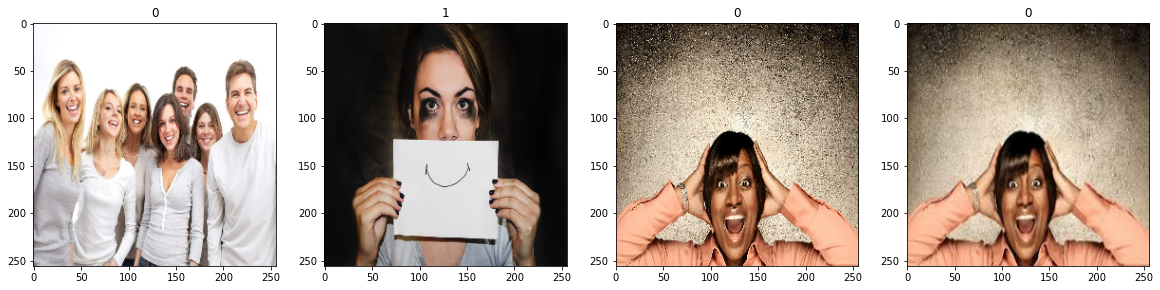

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.9633272 , 0.9633272 , 0.9633272 ],
          [0.96410197, 0.96410197, 0.96410197],
          [0.9633272 , 0.9633272 , 0.9633272 ],
          ...,
          [0.9633272 , 0.9633272 , 0.9633272 ],
          [0.9633272 , 0.9633272 , 0.9633272 ],
          [0.96496415, 0.96496415, 0.96496415]],
 
         [[0.9611826 , 0.9611826 , 0.9611826 ],
          [0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9647059 , 0.9647059 , 0.9647059 ],
          ...,
          [0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9647059 , 0.9647059 , 0.9647059 ],
          [0.9607843 , 0.9607843 , 0.9607843 ]],
 
         [[0.9611826 , 0.9611826 , 0.9611826 ],
          [0.9626396 , 0.9626396 , 0.9626396 ],
          [0.96319675, 0.96319675, 0.96319675],
          ...,
          [0.96173406, 0.96173406, 0.96173406],
          [0.96173406, 0.96173406, 0.96173406],
          [0.9607843 , 0.9607843 , 0.9607843 ]],
 
         ...,
 
         [[0.96460944, 0.96460944, 0.96460944],
          [0.96197

### Splitting Data

In [ ]:
len(data)

7

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) + 1

In [ ]:
train_size
#val_size
#test_size

4

In [ ]:
train_size + val_size + test_size

7

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [ ]:
#len(train)
len(val)
#len(test)

2

### Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

#### Training

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 4s 714ms/step - loss: 1.0653 - accuracy: 0.5000 - val_loss: 0.6733 - val_accuracy: 0.6719
Epoch 2/20
4/4 [==============================] - 3s 665ms/step - loss: 0.6913 - accuracy: 0.4688 - val_loss: 0.6918 - val_accuracy: 0.5156
Epoch 3/20
4/4 [==============================] - 3s 627ms/step - loss: 0.6830 - accuracy: 0.6719 - val_loss: 0.6425 - val_accuracy: 0.6406
Epoch 4/20
4/4 [==============================] - 3s 645ms/step - loss: 0.5882 - accuracy: 0.6562 - val_loss: 0.5765 - val_accuracy: 0.6406
Epoch 5/20
4/4 [==============================] - 3s 648ms/step - loss: 0.5959 - accuracy: 0.7656 - val_loss: 0.5713 - val_accuracy: 0.7031
Epoch 6/20
4/4 [==============================] - 3s 635ms/step - loss: 0.5630 - accuracy: 0.6875 - val_loss: 0.4622 - val_accuracy: 0.8281
Epoch 7/20
4/4 [==============================] - 3s 635ms/step - loss: 0.4909 - accuracy: 0.7969 - val_loss: 0.4597 - val_accuracy: 0.7344
Epoch 8/20
4/4 [====

In [ ]:
hist.history

{'loss': [1.0653042793273926,
  0.6912999153137207,
  0.6830448508262634,
  0.588210940361023,
  0.5958822965621948,
  0.5629976391792297,
  0.4908857047557831,
  0.4265856146812439,
  0.30988001823425293,
  0.4019505977630615,
  0.26749393343925476,
  0.3302392363548279,
  0.24275755882263184,
  0.19742991030216217,
  0.13938675820827484,
  0.09186391532421112,
  0.084837906062603,
  0.11147573590278625,
  0.08925378322601318,
  0.06313014775514603],
 'accuracy': [0.5,
  0.46875,
  0.671875,
  0.65625,
  0.765625,
  0.6875,
  0.796875,
  0.78125,
  0.921875,
  0.8359375,
  0.875,
  0.8671875,
  0.921875,
  0.8984375,
  0.96875,
  0.9765625,
  0.984375,
  0.953125,
  0.9765625,
  1.0],
 'val_loss': [0.6732984185218811,
  0.6918035745620728,
  0.6424951553344727,
  0.5765078067779541,
  0.5712644457817078,
  0.4622204899787903,
  0.4596938490867615,
  0.3112407922744751,
  0.3007949888706207,
  0.3824041783809662,
  0.3443411588668823,
  0.2512285113334656,
  0.21487697958946228,
  0.17

#### Performance Plot

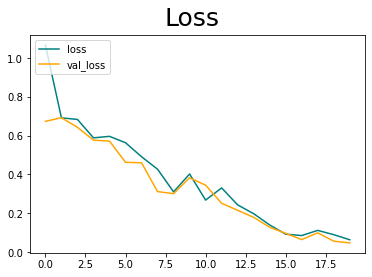

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 25)
plt.legend(loc = 'upper left')
plt.show()

##### as we can see there is no overfitting in the figure above

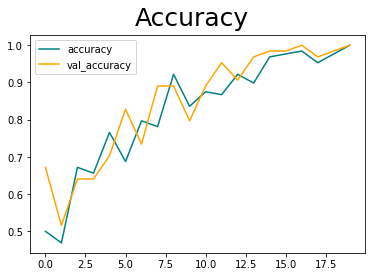

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 25)
plt.legend(loc = 'upper left')
plt.show()

As we can see from  the figures above, the models worked pretty well, without there being a problem of overfitting. 
The Loss performance and Accuracy performance, to me, looks very neat and, for the lack of a better word, accurate. 

## Evaluating Performance 

In [ ]:
from tensorflow.keras.metrics import Recall, BinaryAccuracy, Precision

In [ ]:
re = Recall()
acc = BinaryAccuracy()
pre = Precision()

In [ ]:
len(test)

1

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    pre.update_state(y, yhat)

1/1 [==============================] - 0s 85ms/step


In [ ]:
print(f'Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}, Precision:{pre.result().numpy()}')

Recall:1.0, Accuracy:0.9166666865348816, Precision:0.8333333134651184


### Testing it outside of the batch

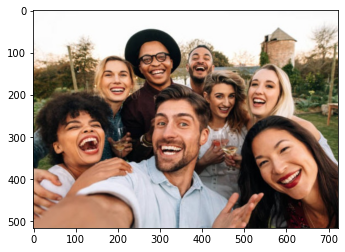

In [ ]:
img = cv2.imread('happypeople.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

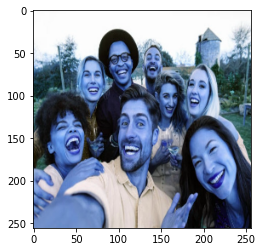

In [ ]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 20ms/step


In [ ]:
yhat

array([[0.04826921]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted SAD')
else:
    print(f'Predicted HAPPY')

Predicted HAPPY


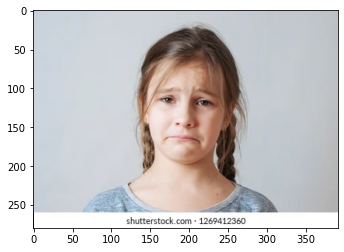

In [ ]:
img = cv2.imread('sadpeople.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

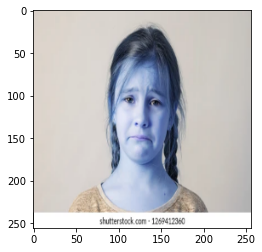

In [ ]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 22ms/step


In [ ]:
yhat

array([[0.6233435]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted SAD')
else:
    print(f'Predicted HAPPY')

Predicted SAD


In [ ]:
### Saving the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models', 'imageclassifier.h5'))

In [ ]:
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))

In [ ]:
new_model

In [ ]:
newyhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 20ms/step


In [ ]:
newyhat

array([[0.6233435]], dtype=float32)

In [ ]:
if newyhat > 0.5:
    print(f'Predicted SAD')
else:
    print(f'Predicted HAPPY')

Predicted SAD


# Summary

1. Installed Dependencies.
2. Collected data through Google Chrome Extension which helped download the images from the page into a Zip file. Open source images were used.
2. Removed unnecessary and dodgy images.
3. Loaded the dataset using image dataset from directory.
4. Preprocessed the data, scaled the data and split the data. 
5. Built a Deep Neural Network.
6. Trained the dataset  using the .fit().
7. Evaluated the performance of the model.
8. Again, evaluated the model against new images from the internet to check the prediction accuracy.
9. Finally, saved the model into .h5 for potential future use. 